<a href="https://colab.research.google.com/github/rickiepark/the-ml-book/blob/main/Ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장 학습 알고리즘

## 4.2 경사 하강법

In [1]:
!wget https://raw.githubusercontent.com/rickiepark/the-ml-book/refs/heads/main/data.txt

--2025-12-14 03:34:18--  https://raw.githubusercontent.com/rickiepark/the-ml-book/refs/heads/main/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4756 (4.6K) [text/plain]
Saving to: ‘data.txt.1’

data.txt.1          100%[===================>]   4.64K  --.-KB/s    in 0s      

2025-12-14 03:34:18 (51.0 MB/s) - ‘data.txt.1’ saved [4756/4756]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})


def plot_original_data():
    df = pd.read_csv("data.txt")
    x = df['radio'].to_numpy()
    y = df['sales'].to_numpy()

    plt.scatter(x, y, color='#1f77b4', marker='o')

    plt.xlabel("Spendings, M$")
    plt.ylabel("Sales, Units")
    plt.title("Sales as a function of radio ad spendings.")
    #plt.show()
    fig1 = plt.gcf()
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)

In [3]:
df = pd.read_csv("data.txt")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


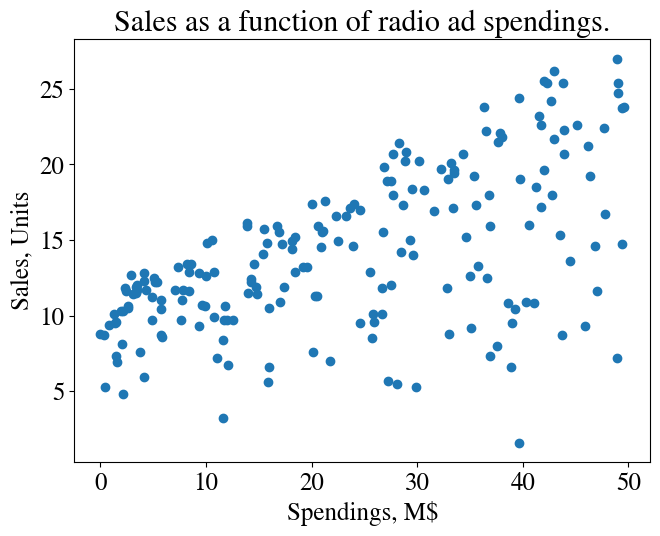

In [4]:
plot_original_data()

$\dfrac{∂l}{∂w} = \dfrac{1}{N}\displaystyle\sum_{i=1}^N\left(-2(y_i - \hat{y_i}) x_i\right)$

$\dfrac{∂l}{∂b} = \dfrac{1}{N}\displaystyle\sum_{i=1}^N\left(-2(y_i - \hat{y_i})\right)$

$w = w - α \dfrac{∂l}{∂w}$

$b = b - α \dfrac{∂l}{∂b}$

In [5]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)

    for i in range(N):
        dl_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dl_db += -2 * (sales[i] - (w * spendings[i] + b))

    # update w and b
    w = w - (dl_dw/float(N)) * alpha
    b = b - (dl_db/float(N)) * alpha

    return w, b

def loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / N

def train(spendings, sales, w, b, alpha, epochs):
    image_counter = 2;
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)

        # log the progress
        if (e == 0) or (e < 3000 and e % 400 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+str(loss(spendings, sales, w, b)))
            print("w, b: ", w, b)
            plt.figure(image_counter)
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,30])
            plt.scatter(spendings, sales)
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot, X_plot*w + b)
            #plt.show()
            fig1 = plt.gcf()
            fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
            image_counter += 1
    return w, b

epoch:  0 loss: 92.32078294903626
w, b:  0.7412639000000002 0.028045000000000007
epoch:  400 loss: 33.79131790081576
w, b:  0.4282720349432519 1.933428695950039
epoch:  800 loss: 27.9918542960729
w, b:  0.38178288442481695 3.4526614981614254
epoch:  1200 loss: 24.33481690722147
w, b:  0.34486622481754114 4.659072017562193
epoch:  1600 loss: 22.028754937538633
w, b:  0.31555100306447775 5.617072884316986
epoch:  2000 loss: 20.57459375662496
w, b:  0.2922720218247468 6.3778136487118635
epoch:  2400 loss: 19.657625883308423
w, b:  0.273786370509382 6.98191175623499
epoch:  2800 loss: 19.07940244306619
w, b:  0.25910706384066806 7.461621192869828
epoch:  3000 loss: 18.876170218021276
w, b:  0.2529431349721907 7.663054061034952
epoch:  6000 loss: 18.117072440822145
w, b:  0.21144673626951038 9.019127238963959
epoch:  9000 loss: 18.0931745529731
w, b:  0.20408396502930684 9.259737434215003
epoch:  12000 loss: 18.092422200561078
w, b:  0.20277757695635729 9.302429279316703


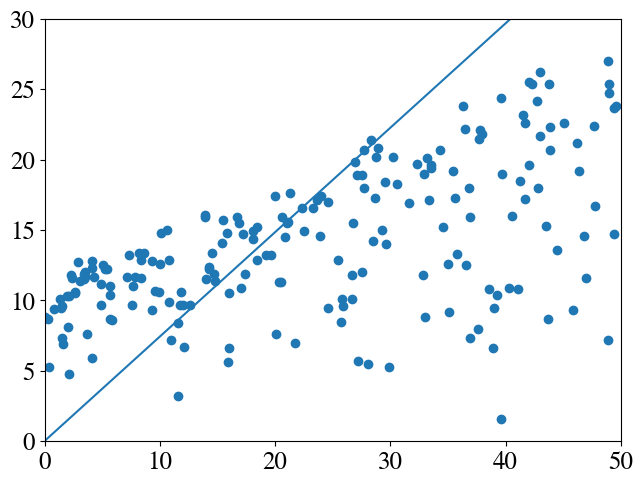

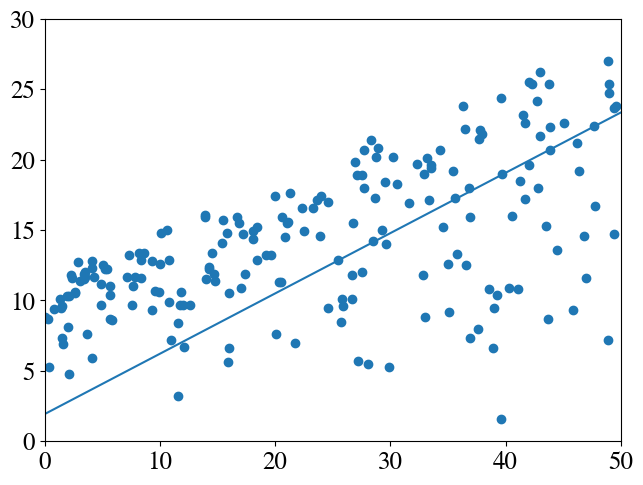

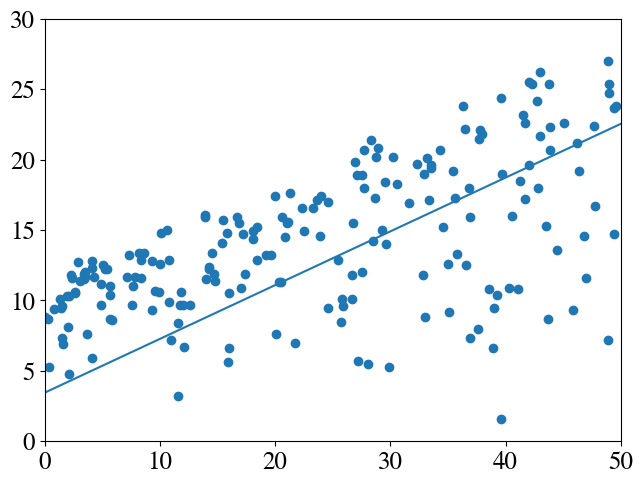

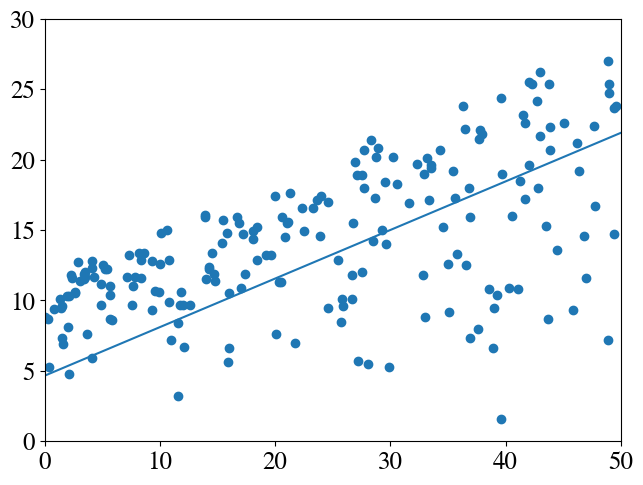

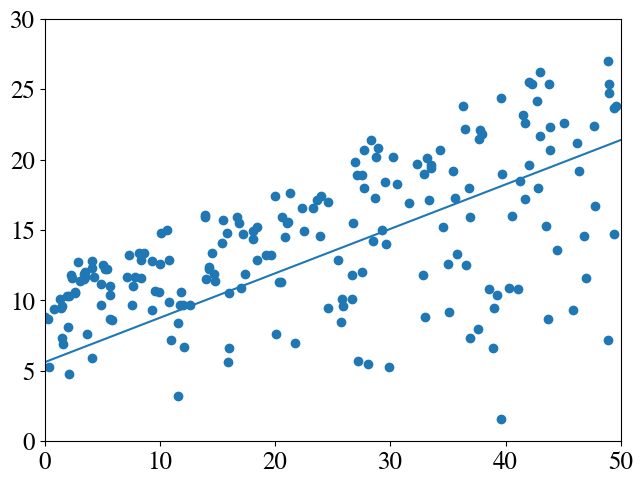

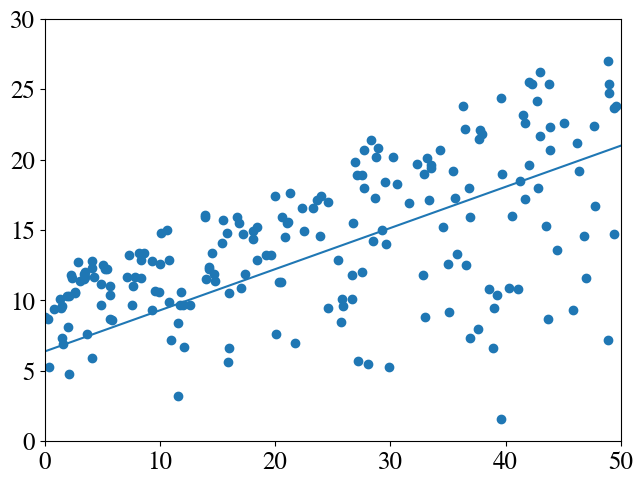

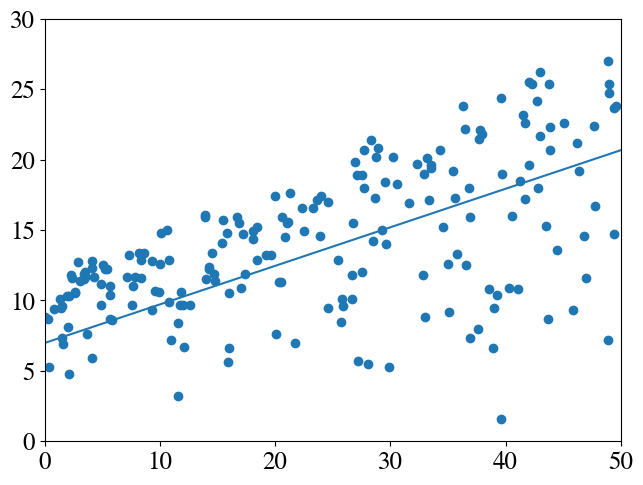

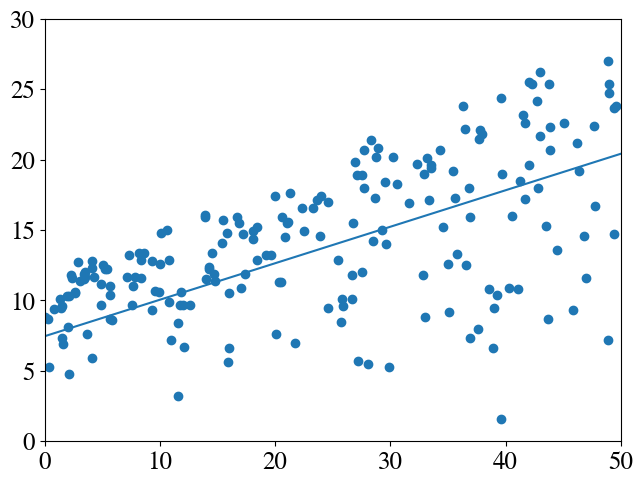

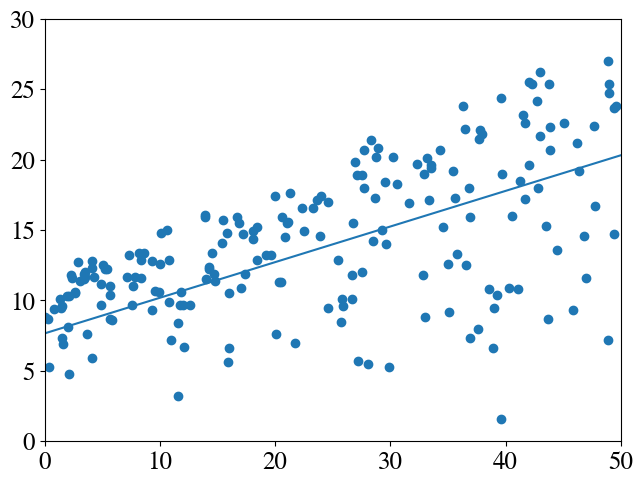

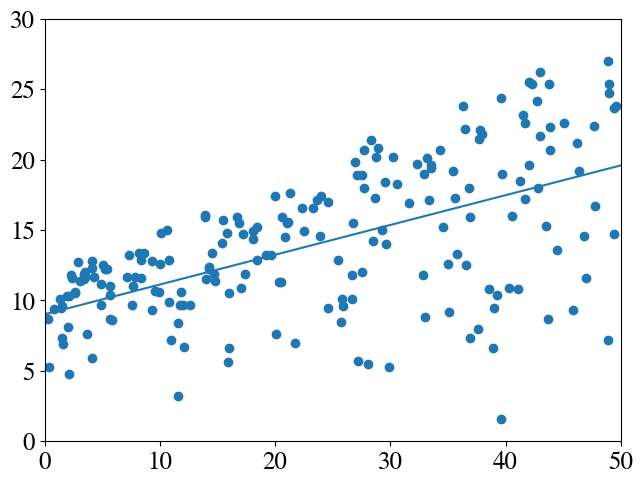

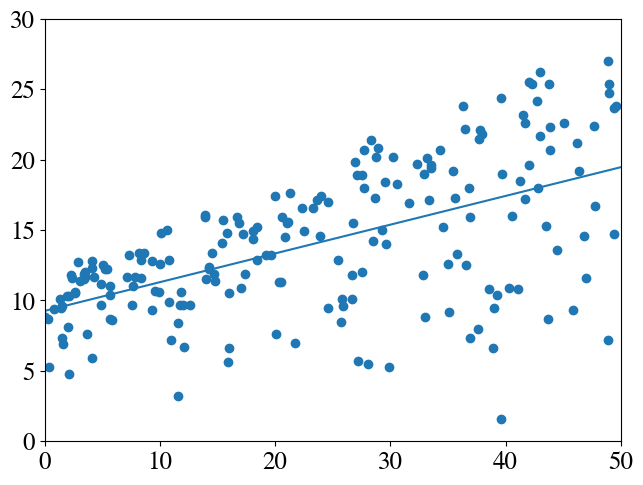

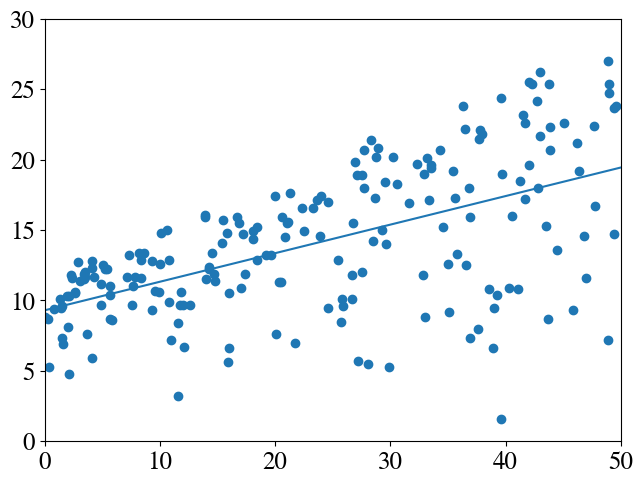

In [6]:
df = pd.read_csv("data.txt")
x = df['radio'].to_numpy()
y = df['sales'].to_numpy()
w, b = train(x, y, 0.0, 0.0, 0.001, 15000)

In [7]:
def predict(x, w, b):
    return w*x + b

x_new = 23.0
y_new = predict(x_new, w, b)
print(y_new)

13.968556878212048
